In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import sys
import os
from sklearn.base import clone 
# make paths above 'notebooks/' visible for local imports.
# +----------------------------------------------------------------------------+
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.processing import GatherFeatureDatasets
from src.train import TrainStationModel, OptModelSelectionMethods
from src.plotting import plot_r2_heatmap
from src.utils import CrossValidation as cv

# Load Data

In [2]:
proc = GatherFeatureDatasets(is_p=False)
proc.compute_feature_matrix

<function src.processing.SFeatures.compute_feature_matrix(df, freq_max=18, scaler=True, source_dist_type='dist', linear_model=True, w_r=0.5)>

In [3]:
data_dir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/feature_splits'
train = pd.read_csv(f'{data_dir}/s.train.csv')
test = pd.read_csv(f'{data_dir}/s.test.csv')
holdout = pd.read_csv(f'{data_dir}/s.20230101.csv')
station_feature_dict, station_meta_dict, feature_names = proc.process_all_stations_datasets(train, 
                                                                  test, 
                                                                  holdout_df=holdout,
                                                                  scaler=False,
                                                                  linear_model=False,
                                                                  source_dist_type='dist')
feature_names

YHB
X shape: (1248, 45), y shape: (1248,)
X shape: (331, 45), y shape: (331,)
X shape: (225, 45), y shape: (225,)
YHL
X shape: (537, 45), y shape: (537,)
X shape: (133, 45), y shape: (133,)
X shape: (39, 45), y shape: (39,)
YMR
X shape: (1533, 45), y shape: (1533,)
X shape: (392, 45), y shape: (392,)
X shape: (172, 45), y shape: (172,)
YHH
X shape: (1222, 45), y shape: (1222,)
X shape: (328, 45), y shape: (328,)
X shape: (113, 45), y shape: (113,)
B207
X shape: (341, 45), y shape: (341,)
X shape: (83, 45), y shape: (83,)
FLWY
X shape: (319, 45), y shape: (319,)
X shape: (89, 45), y shape: (89,)
X shape: (12, 45), y shape: (12,)
YUF
X shape: (816, 45), y shape: (816,)
X shape: (227, 45), y shape: (227,)
X shape: (118, 45), y shape: (118,)
YPP
X shape: (189, 45), y shape: (189,)
X shape: (58, 45), y shape: (58,)
X shape: (35, 45), y shape: (35,)
YNR
X shape: (2090, 45), y shape: (2090,)
X shape: (541, 45), y shape: (541,)
X shape: (99, 45), y shape: (99,)
YML
X shape: (423, 45), y shape:

array(['amp_ratio_1', 'amp_ratio_2', 'amp_ratio_3', 'amp_ratio_4',
       'amp_ratio_5', 'amp_ratio_6', 'amp_ratio_7', 'amp_ratio_8',
       'amp_ratio_9', 'amp_ratio_10', 'amp_ratio_11', 'amp_ratio_12',
       'amp_ratio_13', 'amp_ratio_14', 'amp_ratio_15', 'amp_ratio_16',
       'amp_ratio_17', 'amp_ratio_18', 'amp_1', 'amp_2', 'amp_3', 'amp_4',
       'amp_5', 'amp_6', 'amp_7', 'amp_8', 'amp_9', 'amp_10', 'amp_11',
       'amp_12', 'amp_13', 'amp_14', 'amp_15', 'amp_16', 'amp_17',
       'amp_18', 'signal_dominant_frequency', 'signal_dominant_amplitude',
       'noise_max_amplitude', 'signal_max_amplitude', 'signal_variance',
       'noise_variance', 'source_depth_km',
       'source_receiver_distance_logkm',
       'source_receiver_back_azimuth_deg'], dtype='<U32')

In [4]:
# distance, amp. 1., amp. 2, amp 4., depth, | noise max. amp., back az.
selected_features = ['amp_1', 'amp_2', 
                     'amp_4', 'noise_variance',
                     'source_depth_km',
                    'source_receiver_distance_logkm',
                    'source_receiver_back_azimuth_deg']

In [5]:
selected_feat_dict, selected_feature_names = proc.filter_station_dict_features(station_feature_dict,
                                                                             feature_names,
                                                                             selected_features)

YHB
X_train: (1248, 7), X_test: (331, 7), X_holdout: (225, 7)
YHL
X_train: (537, 7), X_test: (133, 7), X_holdout: (39, 7)
YMR
X_train: (1533, 7), X_test: (392, 7), X_holdout: (172, 7)
YHH
X_train: (1222, 7), X_test: (328, 7), X_holdout: (113, 7)
B207
X_train: (341, 7), X_test: (83, 7), X_holdout: 0
FLWY
X_train: (319, 7), X_test: (89, 7), X_holdout: (12, 7)
YUF
X_train: (816, 7), X_test: (227, 7), X_holdout: (118, 7)
YPP
X_train: (189, 7), X_test: (58, 7), X_holdout: (35, 7)
YNR
X_train: (2090, 7), X_test: (541, 7), X_holdout: (99, 7)
YML
X_train: (423, 7), X_test: (126, 7), X_holdout: (7, 7)
YFT
X_train: (899, 7), X_test: (214, 7), X_holdout: (55, 7)
LKWY
X_train: (209, 7), X_test: (50, 7), X_holdout: (2, 7)
YTP
X_train: (391, 7), X_test: (95, 7), X_holdout: (49, 7)
B206
X_train: (195, 7), X_test: (60, 7), X_holdout: 0
YMC
X_train: (1443, 7), X_test: (363, 7), X_holdout: (171, 7)
YNM
X_train: (487, 7), X_test: (137, 7), X_holdout: (6, 7)
B950
X_train: (152, 7), X_test: (42, 7), X_hold

In [6]:
selected_features

['amp_1',
 'amp_2',
 'amp_4',
 'noise_variance',
 'source_depth_km',
 'source_receiver_distance_logkm',
 'source_receiver_back_azimuth_deg']

# Set Parameters

I believe the version of the model_selector used here also favors smaller gamma values (on accident). If there are multiple model scores within 1 st. err. of the best score that have the same min_C, then the gamma with the smaller index is selected. The smaller index should correspond to the smaller gamma.

In [7]:
# Model parameters
model = SVR(kernel='rbf')
model_scaler = True
outdir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/selected_features'
phase = 'S'
model_selector = OptModelSelectionMethods.select_cv_ind_min_C
model_selector_tol = None

# CV Parameters
cv_random_state = 2652124
cv_folds_inner = 5
svr_C_range= 10**np.arange(-3, 5, dtype=float)
svr_gamma_range = 10**np.arange(-4, 3, dtype=float)
param_grid = [
    {'m__C': svr_C_range, 'm__gamma': svr_gamma_range},
]
scoring_method='r2'
n_jobs_inner = 5
print(param_grid)

[{'m__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]), 'm__gamma': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])}]


# Select hyperparameters, train and evaluate the final model

In [8]:
with open(os.path.join(outdir, 'selected_feature_names.txt'), 'w') as fp:
    for ft in selected_feature_names:
        fp.write(f'{ft}\n')

YHB
1 St. Err. Tol=  0.05439
YHL
1 St. Err. Tol=  0.05350
YMR
1 St. Err. Tol=  0.05341
YHH
1 St. Err. Tol=  0.04944
B207
1 St. Err. Tol=  0.05390
FLWY
1 St. Err. Tol=  0.04557
YUF
1 St. Err. Tol=  0.05379
YPP
1 St. Err. Tol=  0.05178
YNR
1 St. Err. Tol=  0.05259
YML
1 St. Err. Tol=  0.05249
YFT
1 St. Err. Tol=  0.05523
LKWY
1 St. Err. Tol=  0.05303
YTP
1 St. Err. Tol=  0.05136
B206
1 St. Err. Tol=  0.05563
YMC
1 St. Err. Tol=  0.04580
YNM
1 St. Err. Tol=  0.05577
B950
1 St. Err. Tol=  0.05350
YDD
1 St. Err. Tol=  0.05352


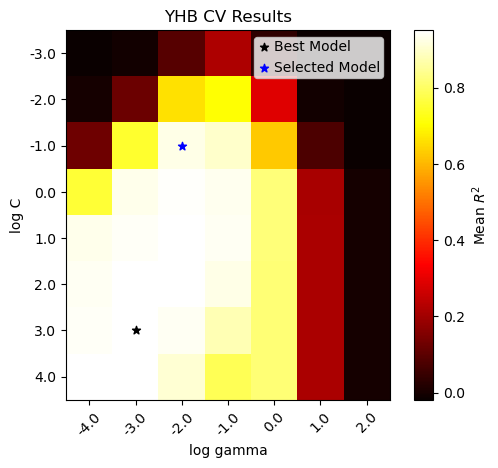

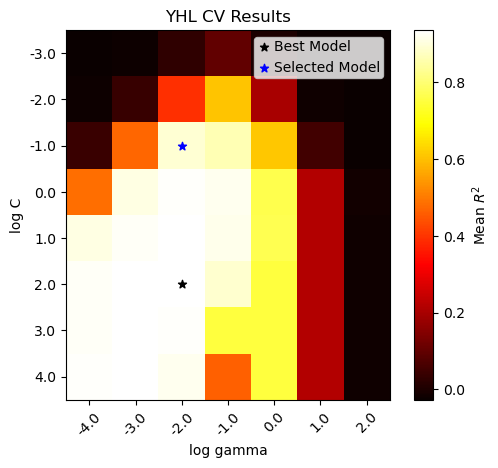

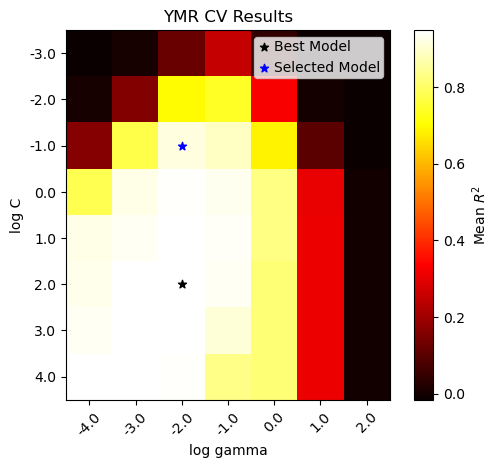

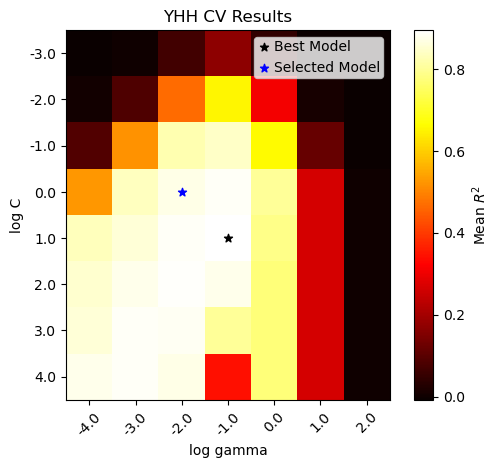

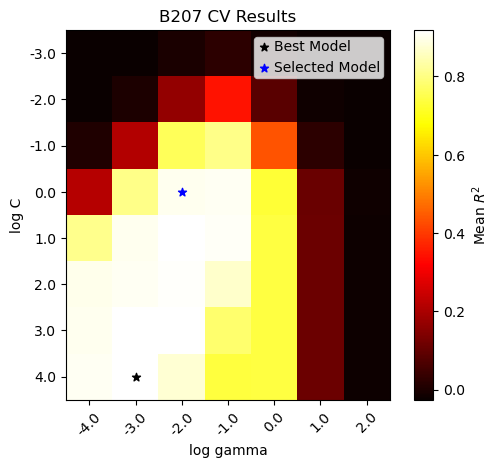

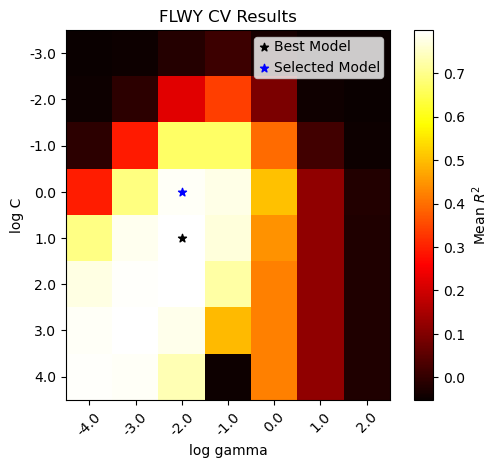

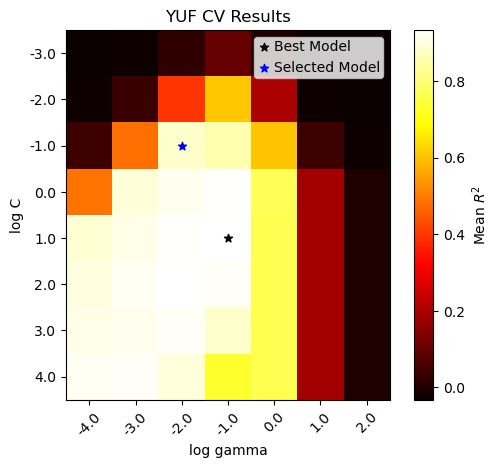

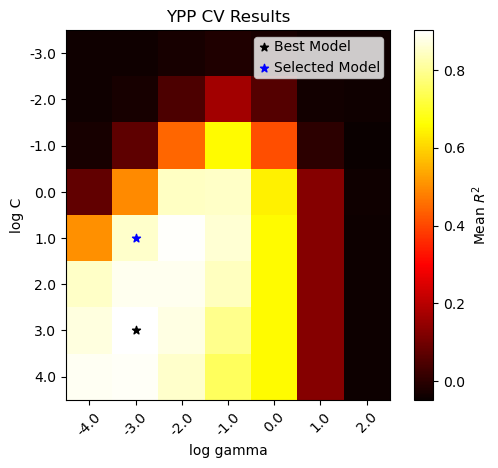

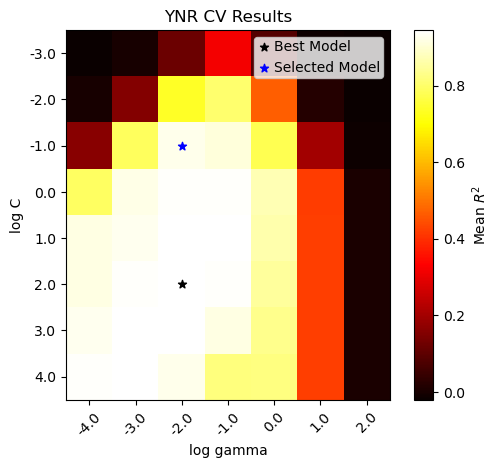

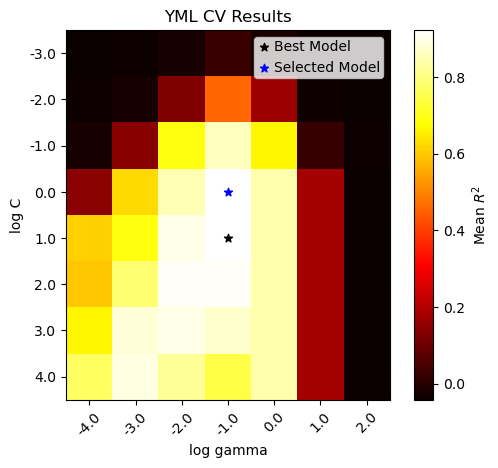

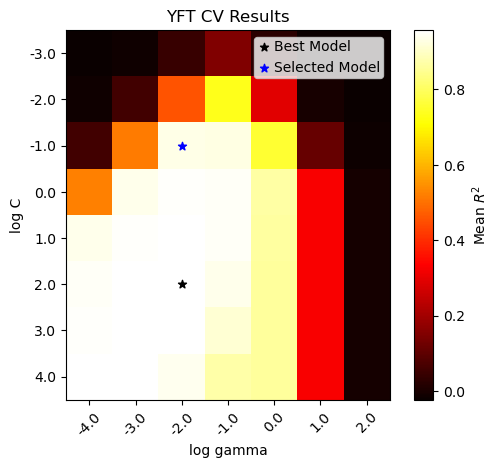

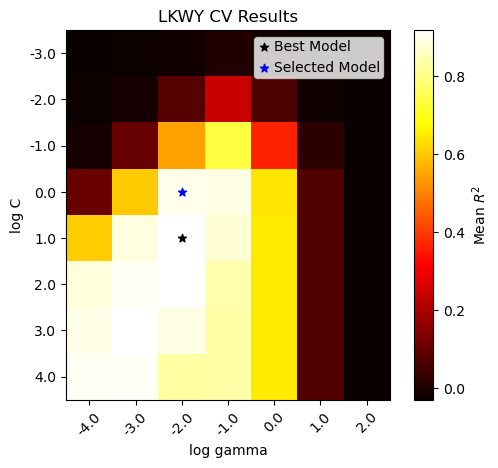

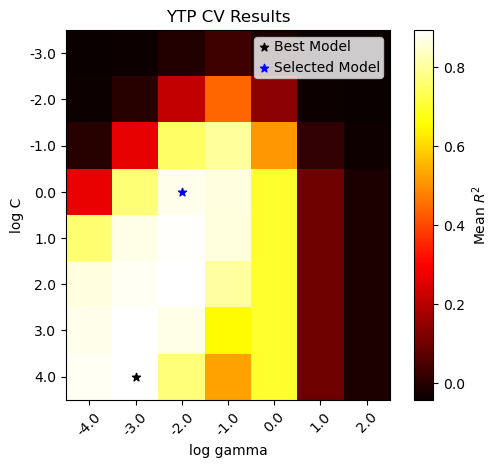

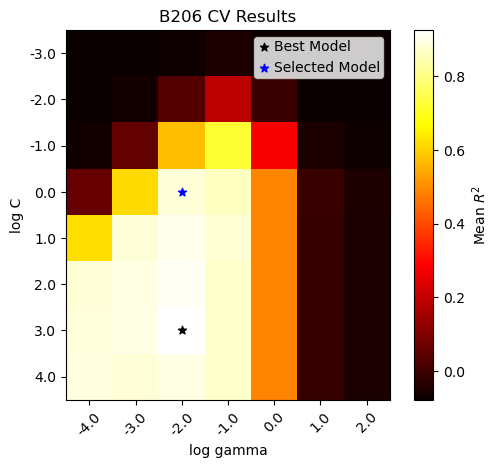

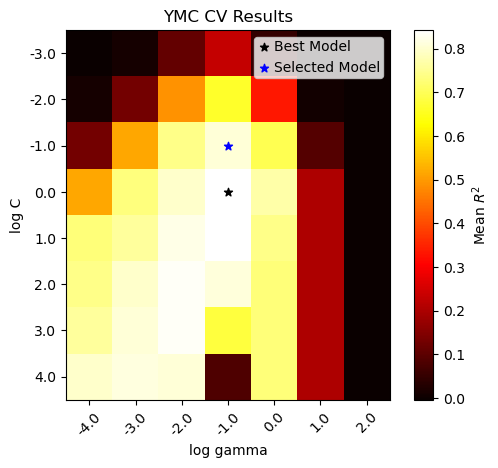

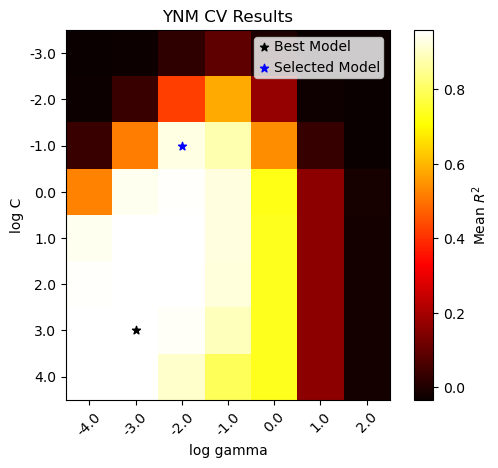

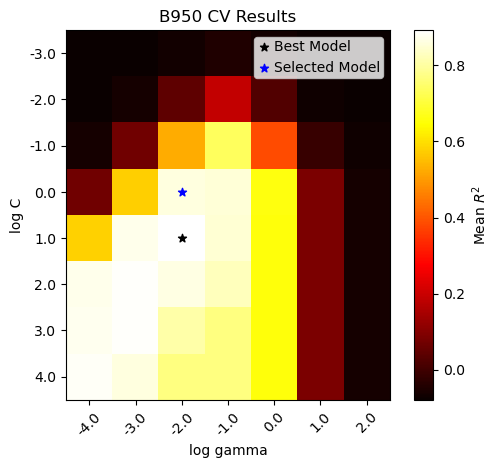

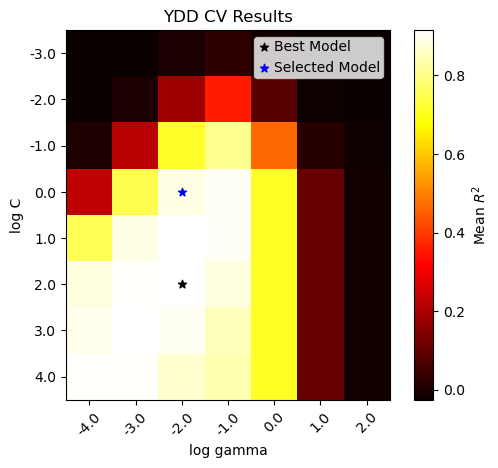

In [9]:
stations = selected_feat_dict.keys()
results_dict_list = []

for station in stations:
    # Set up the grid search
    print(station)
    search, cv_inner = cv.setup_cv(clone(model),
                param_grid,
                model_scaler=model_scaler,
                scoring_method=scoring_method,
                n_jobs=n_jobs_inner,
                cv_folds=cv_folds_inner,
                cv_random_state=cv_random_state,
                refit_model = False)
    
    trainer = TrainStationModel(station,
                                phase,
                                selected_feat_dict[station],
                                station_meta_dict[station])
    
    opt_pipeline = cv.make_simple_pipeline(clone(model), model_scaler)
    gs_results, train_results_dict = trainer.train_model_with_cv(search,
                                                                    opt_pipeline,
                                                                    model_selector_fn=model_selector,
                                                                    model_selector_tol=model_selector_tol
                                                                    )
    all_yhat, eval_results_dict = trainer.eval_all_splits(opt_pipeline)
    results_dict = trainer.format_results_dict(train_results_dict,eval_results_dict)
    trainer.save_all_predictions(all_yhat, outdir)
    trainer.save_model(opt_pipeline, outdir)
    plot_r2_heatmap(gs_results, 
                    svr_C_range,
                    svr_gamma_range,
                    train_results_dict['cv_ind_sel'], 
                    station,
                    outdir=outdir,
                    show=True)
    
    results_dict_list.append(results_dict)

results_df = pd.DataFrame(results_dict_list)
results_df.to_csv(os.path.join(outdir, 'all.stat.results.csv'), index=False)
                                        